## Convergence testing for $\text{GiRaFFE_HO}$

After importing core Python modules, we will read in the data output by GiRaFFE.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data_for_dx = np.loadtxt("BU2.xo2.asc")
Data_for_dxo2 = np.loadtxt("BU2.xo4.asc")

Now, both the outer boundary and the singularity can introduce errors into the simulation. We will neglect those areas by excluding the regions $r>40$ and $r<10$

In [2]:
rmin = 10
rmax = 35

M = len(Data_for_dx)
i = 0
while i<M:
    x = Data_for_dx[i,5]
    y = Data_for_dx[i,6]
    z = Data_for_dx[i,7]
    r = np.sqrt(x*x+y*y+z*z)
    if r<rmin or r>rmax:
        Data_for_dx = np.delete(Data_for_dx,i,axis=0)
        M -= 1
        i -= 1
    i += 1
    
M = len(Data_for_dxo2)
i = 0
while i<M:
    x = Data_for_dxo2[i,5]
    y = Data_for_dxo2[i,6]
    z = Data_for_dxo2[i,7]
    r = np.sqrt(x*x+y*y+z*z)
    if r<rmin or r>rmax:
        Data_for_dxo2 = np.delete(Data_for_dxo2,i,axis=0)
        M -= 1
        i -= 1
    i += 1

The Exact Wald solution is a stationary solution to Einstein's and Maxwell's equations, so we will treat the initial data as the exact solution, comparing it to data at the 16$^{\rm th}$ timestep, corresponding to $t \approx 0.52 M$. The output files are currently formatted such that the first half of lines correspond to initial data, and the second half to final data.

In [3]:
N_rows = len(Data_for_dx[:,0])
Init_x = Data_for_dx[0:N_rows/2,5]
Init_BU2 = Data_for_dx[0:N_rows/2,8]
Final_x = Data_for_dx[N_rows/2:N_rows,5]
Final_BU2 = Data_for_dx[N_rows/2:N_rows,8]

N_rows = len(Data_for_dxo2[:,0])
Init_xo2 = Data_for_dxo2[0:N_rows/2,5]
Init_BU2o2 = Data_for_dxo2[0:N_rows/2,8]
Final_xo2 = Data_for_dxo2[N_rows/2:N_rows,5]
Final_BU2o2 = Data_for_dxo2[N_rows/2:N_rows,8]


As usual, we expect the relative error of these quantities to decrease as $2^N$. Here, $N$ should be 6, corresponding to FD order.

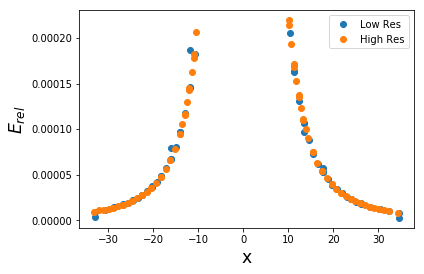

In [4]:
Erel = np.abs(2*(Final_BU2-Init_BU2)/(Final_BU2+Init_BU2))
Erelo2 = np.abs(2*(Final_BU2o2-Init_BU2o2)/(Final_BU2o2+Init_BU2o2))

predicted_order = 0

Erel_plot = plt.plot(Init_x,Erel,'o',label="Low Res")
Erel_plot_o2 = plt.plot(Init_xo2,Erelo2*2**predicted_order,'o',label="High Res")
plt.ylabel("$E_{rel}$",fontsize="xx-large")
plt.xlabel("x",fontsize="xx-large")
plt.legend()